# Import all important and required libraries

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# scrap hotelname,address,currentprice,actual price and discount

In [ ]:
HotelName = []
Address = []
CurrentPrice = []
ActualPrice = []
Discount = []

# scrap specific website , if response is 200 than successfully scraped from website

In [ ]:
url = 'https://www.oyorooms.com/hotels-in-hyderabad/'
page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
page

<Response [200]>

# Finding the html tag from where to scrap the data .

## scrap the data in particular city i.e. 'pune','mumbai','hyderabad','bangalore','chennai',
#'delhi','shimla','goa','manali','mahabaleshwar','lonavala' 


In [ ]:
cities = ['pune','mumbai','hyderabad','bangalore','chennai','delhi','shimla','goa','manali','mahabaleshwar','lonavala']
for i in cities:
    for j in range(1,16):
        url = 'https://www.oyorooms.com/hotels-in-{}/?page={}'.format(i,j)
        print('Getting data from page ', i)
        page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
        page_context = page.text
        soup = BeautifulSoup(page_context)
        for data in soup.find_all('div' , attrs={'class' : 'oyo-row oyo-row--no-spacing listingHotelDescription'}):
            hname = data.find('h3' , attrs={'class' : 'listingHotelDescription__hotelName d-textEllipsis'})
            address =  data.find('div' , attrs={'class' : 'd-body-lg listingHotelDescription__hotelAddress'})
            curprice = data.find('span' , attrs={'class' : 'listingPrice__finalPrice'})
            actprice = data.find('span' , attrs={'class' : 'listingPrice__slashedPrice d-body-lg'})
            dis = data.find('span',attrs={'class' : 'listingPrice__percentage'})


            if hname is None:
                HotelName.append(np.NaN)
            else:
                HotelName.append(hname.text)

            if address is None:
                Address.append(np.NaN)
            else:
                Address.append(address.text)

            if curprice is None:
                CurrentPrice.append(np.NaN)
            else:
                CurrentPrice.append(curprice.text)

            if actprice is None:
                ActualPrice.append(np.NaN)
            else:
                ActualPrice.append(actprice.text)

            if dis is None:
                Discount.append(np.NaN)
            else:
                Discount.append(dis.text)

Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  hyderaba

# scrap rating part in particular city wise

In [ ]:
Rating = []

for i in cities:
    for j in range(1,16):
        url = 'https://www.oyorooms.com/hotels-in-{}/?page={}'.format(i,j)
        print('Getting data from page ', i)
        page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
        page_context = page.text
        soup = BeautifulSoup(page_context)
        for data in soup.find_all('div' , attrs={'class' : 'oyo-cell--12-col listingHotelDescription__content'}):
            rat = data.find('div' , attrs={'class' : 'hotelRating'})

            if rat is None:
                Rating.append(np.NaN)
            else:
                Rating.append(rat.text)

Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  hyderaba

# scrap facility data city wise

In [ ]:
Facility = []
for i in cities:
    for j in range(1,16):
        url = 'https://www.oyorooms.com/hotels-in-{}/?page={}'.format(i,j)
        print('Getting data from page ', i)
        page = requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
        page_context = page.text
        soup = BeautifulSoup(page_context)
        for data in soup.find_all('div' , attrs={'class' : 'oyo-cell--12-col listingHotelDescription__content'}):
            fac = data.find('div' , attrs={'class' : 'amenityWrapper'})
            if fac is None:
                Facility.append(np.NaN)
            else:
                Facility.append(fac.text)

Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  pune
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  mumbai
Getting data from page  hyderabad
Getting data from page  hyderabad
Getting data from page  hyderaba

# length of each and every Attribute

In [ ]:
print(len(HotelName))
print(len(Address))
print(len(ActualPrice))
print(len(Discount))
print(len(CurrentPrice))
print(len(Rating))
print(len(Facility))


719
719
719
719
719
719
719


#when the length is not same of each and every data that time use this 

In [ ]:
#Facility.append('')


## Creating the Data frame of Scraped data 

In [ ]:
OYO = pd.DataFrame({
                    'HotelName' : HotelName , 
                    'Address':Address,                     
                    'OriginalRentNight': ActualPrice,
                    'Discount': Discount,
                    'AmountPayableNight': CurrentPrice,
                    'Rating'  : Rating,
                    'Facility' : Facility                                   
                                  
                   })

In [ ]:
OYO

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility
0,OYO Hotel G Residency Near INOX,"India, Pune· 4.3 km",₹3040,76% off,₹709,3.2 (232 Ratings)·Fair,Doctor on call Reception Ticket tour assist...
1,Super OYO Collection O Hotel Sunshine Near Inox,"Near New White House, Koregaon Park,Pune· ...",₹5678,67% off,₹1828,4.5 (1474 Ratings)·Excellent,Parking facility Free Wifi Geyser + 8 more
2,OYO The Orchid Guest House Near Phugewadi Metr...,"Near Laxmi Mata Mandir, Pune· 5.5 km",₹3114,67% off,₹1003,3.4 (263 Ratings)·Fair,Hair Dryer Parking facility Free Wifi + 11...
3,OYO SilverKey Near Arup Hospital Near Pune Air...,"Near Tempo Chowk, Vadgaon Sheri, Pune· 7...",₹3422,64% off,₹1198,3.5 (2599 Ratings)·Good,Reception Free Wifi Bedside Table / Desk +...
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",₹4188,67% off,₹1349,4.2 (1289 Ratings)·Very Good,Free Wifi AC TV + 3 more
...,...,...,...,...,...,...,...
714,SPOT ON 77844 Shahani Wellness Retreat,"Near Telephone Exchange, Lonavala· 0.4 km",₹5028,68% off,₹1566,3.5 (327 Ratings)·Good,Reception Caretaker Garden/Backyard + 24 more
715,Townhouse OAK Horizon Holidays,"Mawalnull, Lonavala· 0.7 km",₹5865,65% off,₹2053,3.2 (411 Ratings)·Fair,Private entrance Parking facility Reception...
716,Flagship Hotel Sai Residenci,"Dongergaonwadi, Pawna road, Lonavala· 3....",₹4438,79% off,₹927,2.7 (221 Ratings)·Fair,Parking facility Reception Free Wifi + 19 ...
717,OYO Tara Height's,"Aunde road,Nr Shirke building , Bhairavnath Na...",₹3943,73% off,₹1028,4.1 (76 Ratings)·Very Good,Ticket tour assistance Reception Caretaker ...


##Apply Regular Expression to clean data in proper Format

# extracts numeric ratings from the 'Rating' column in the 'OYO' DataFrame using regular expressions and stores them in a new column called 'ReviewRating'.

In [ ]:
regex = r'[0-9][0-9]+'
OYO['ReviewRating'] = OYO['Rating'].apply(lambda x: re.compile(regex).findall(x))
OYO['ReviewRating'] = OYO['ReviewRating'].apply(lambda x: ''.join(x)) 

# uses regular expressions to extract specific quality indicators ('Good', 'Very Good', 'Fabulous', 'Excellent', 'NEW') from the 'Rating' column in the 'OYO' DataFrame. It stores the extracted quality indicators in a new column called 'RoomQuality'.

In [ ]:
regex = r'Good|Very Good|Fabulous|Excellent|NEW'
OYO['RoomQuality'] = OYO['Rating'].apply(lambda x: re.compile(regex).findall(x))
OYO['RoomQuality'] = OYO['RoomQuality'].apply(lambda x: ''.join(x))


#It finds patterns that match a digit between 0 and 5, followed by any characters up to an opening parenthesis. The extracted ratings are then processed to remove any remaining parentheses.

In [ ]:
regex = r'[0-5].+[(]'
OYO['Rating'] = OYO['Rating'].apply(lambda x: re.compile(regex).findall(x))
OYO['Rating'] = OYO['Rating'].apply(lambda x: ''.join(x))
OYO['Rating'] = OYO['Rating'].apply(lambda x: x.replace('(',''))

# extract city names from the 'Address' column in the 'OYO' DataFrame. It matches the occurrence of predefined city names and assigns the extracted city names to the 'Location' column

In [ ]:
regex = r'Pune|pune|Mumbai|mumbai|Goa|goa|Hyderabad|hyderabad|Bangalore|bangalore|Chennai|chennai|Delhi|delhi|Shimla|shimla|Manali|manali|Mahabaleshwar|mahabaleshwar|Lonavala|lonavala'
OYO['Location'] = OYO['Address'].apply(lambda x: re.compile(regex).findall(x))
OYO['Location'] = OYO['Location'].apply(lambda x: ''.join(x)) 

#creating Excel file for storing data for future work

In [ ]:
OYO.to_excel('oyo.xlsx', sheet_name='oyo_data',index=False)

In [ ]:
oyo = pd.read_excel('oyo.xlsx', sheet_name='oyo_data')
oyo

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
0,OYO Hotel G Residency Near INOX,"India, Pune· 4.3 km",₹3040,76% off,₹709,3.2,Doctor on call Reception Ticket tour assist...,232.0,NaN,Pune
1,Super OYO Collection O Hotel Sunshine Near Inox,"Near New White House, Koregaon Park,Pune· ...",₹5678,67% off,₹1828,4.5,Parking facility Free Wifi Geyser + 8 more,1474.0,Excellent,Pune
2,OYO The Orchid Guest House Near Phugewadi Metr...,"Near Laxmi Mata Mandir, Pune· 5.5 km",₹3114,67% off,₹1003,3.4,Hair Dryer Parking facility Free Wifi + 11...,263.0,NaN,Pune
3,OYO SilverKey Near Arup Hospital Near Pune Air...,"Near Tempo Chowk, Vadgaon Sheri, Pune· 7...",₹3422,64% off,₹1198,3.5,Reception Free Wifi Bedside Table / Desk +...,2599.0,Good,Pune
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",₹4188,67% off,₹1349,4.2,Free Wifi AC TV + 3 more,1289.0,Very Good,Pune
...,...,...,...,...,...,...,...,...,...,...
714,SPOT ON 77844 Shahani Wellness Retreat,"Near Telephone Exchange, Lonavala· 0.4 km",₹5028,68% off,₹1566,3.5,Reception Caretaker Garden/Backyard + 24 more,327.0,Good,Lonavala
715,Townhouse OAK Horizon Holidays,"Mawalnull, Lonavala· 0.7 km",₹5865,65% off,₹2053,3.2,Private entrance Parking facility Reception...,411.0,NaN,Lonavala
716,Flagship Hotel Sai Residenci,"Dongergaonwadi, Pawna road, Lonavala· 3....",₹4438,79% off,₹927,2.7,Parking facility Reception Free Wifi + 19 ...,221.0,NaN,Lonavala
717,OYO Tara Height's,"Aunde road,Nr Shirke building , Bhairavnath Na...",₹3943,73% off,₹1028,4.1,Ticket tour assistance Reception Caretaker ...,76.0,Very Good,Lonavala


In [ ]:
oyo.to_excel('oyo2.xlsx', sheet_name='oyo_data',index=False)

In [ ]:
df = pd.read_excel('oyo2.xlsx', sheet_name='oyo_data')
df

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
0,OYO Hotel G Residency Near INOX,"India, Pune· 4.3 km",₹3040,76% off,₹709,3.2,Doctor on call Reception Ticket tour assist...,232.0,NaN,Pune
1,Super OYO Collection O Hotel Sunshine Near Inox,"Near New White House, Koregaon Park,Pune· ...",₹5678,67% off,₹1828,4.5,Parking facility Free Wifi Geyser + 8 more,1474.0,Excellent,Pune
2,OYO The Orchid Guest House Near Phugewadi Metr...,"Near Laxmi Mata Mandir, Pune· 5.5 km",₹3114,67% off,₹1003,3.4,Hair Dryer Parking facility Free Wifi + 11...,263.0,NaN,Pune
3,OYO SilverKey Near Arup Hospital Near Pune Air...,"Near Tempo Chowk, Vadgaon Sheri, Pune· 7...",₹3422,64% off,₹1198,3.5,Reception Free Wifi Bedside Table / Desk +...,2599.0,Good,Pune
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",₹4188,67% off,₹1349,4.2,Free Wifi AC TV + 3 more,1289.0,Very Good,Pune
...,...,...,...,...,...,...,...,...,...,...
714,SPOT ON 77844 Shahani Wellness Retreat,"Near Telephone Exchange, Lonavala· 0.4 km",₹5028,68% off,₹1566,3.5,Reception Caretaker Garden/Backyard + 24 more,327.0,Good,Lonavala
715,Townhouse OAK Horizon Holidays,"Mawalnull, Lonavala· 0.7 km",₹5865,65% off,₹2053,3.2,Private entrance Parking facility Reception...,411.0,NaN,Lonavala
716,Flagship Hotel Sai Residenci,"Dongergaonwadi, Pawna road, Lonavala· 3....",₹4438,79% off,₹927,2.7,Parking facility Reception Free Wifi + 19 ...,221.0,NaN,Lonavala
717,OYO Tara Height's,"Aunde road,Nr Shirke building , Bhairavnath Na...",₹3943,73% off,₹1028,4.1,Ticket tour assistance Reception Caretaker ...,76.0,Very Good,Lonavala


1. Applying the regex to get the useful data.
2. Removing all the \n, %, ₹ characters.
3. Assuming the NaN value and relpace it with NaN value.

# This is useful if we want to remove newlines and have the address values appear as a single line without line breaks.

In [ ]:
oyo['Address'] = oyo.Address.apply(lambda x:x.replace('\n',''))

# fill the null value and checking there is null value or not

In [ ]:
# oyo.Rating.agg(np.median)
# oyo.Rating.mode()
oyo.Rating.fillna(4, inplace=True)
oyo.Rating.isna().sum()

0

# removing the substring '% off' from each value

In [ ]:
oyo['Discount'] = oyo.Discount.apply(lambda x:str(x).replace('% off',''))

# convert to floting type

In [ ]:
oyo['Discount'] = oyo.Discount.astype("float")

# removing the '₹' symbol from each value and converting them to float data type

In [ ]:
oyo['AmountPayableNight'] = oyo.AmountPayableNight.apply(lambda x:str(x).replace('₹','')).astype('float')

# removing the '₹' symbol from each value and converting them to float data type

In [ ]:
oyo['OriginalRentNight'] = oyo["OriginalRentNight"].apply(lambda x:str(x).replace('₹','')).astype('float')

In [ ]:
oyo.head()

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
0,OYO Hotel G Residency Near INOX,"India, Pune· 4.3 km",3040.0,76.0,709.0,3.2,Doctor on call Reception Ticket tour assist...,232.0,NaN,Pune
1,Super OYO Collection O Hotel Sunshine Near Inox,"Near New White House, Koregaon Park,Pune· ...",5678.0,67.0,1828.0,4.5,Parking facility Free Wifi Geyser + 8 more,1474.0,Excellent,Pune
2,OYO The Orchid Guest House Near Phugewadi Metr...,"Near Laxmi Mata Mandir, Pune· 5.5 km",3114.0,67.0,1003.0,3.4,Hair Dryer Parking facility Free Wifi + 11...,263.0,NaN,Pune
3,OYO SilverKey Near Arup Hospital Near Pune Air...,"Near Tempo Chowk, Vadgaon Sheri, Pune· 7...",3422.0,64.0,1198.0,3.5,Reception Free Wifi Bedside Table / Desk +...,2599.0,Good,Pune
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",4188.0,67.0,1349.0,4.2,Free Wifi AC TV + 3 more,1289.0,Very Good,Pune


# checks shape

In [ ]:
oyo.shape

(719, 10)

# impute most frequently categorical value to fill up nan value

In [ ]:
oyo.RoomQuality.fillna('very good', inplace= True)

#impute value to fillup nan value in reviewrating column

In [ ]:
oyo.ReviewRating.fillna(0, inplace=True)

# check is there null value or not

In [ ]:
oyo.ReviewRating.isna().sum()

0

# check how many null values in discount column

In [ ]:
oyo.Discount.isna().sum()

53

#calculate median value

In [ ]:
oyo.Discount.agg(np.median)

65.0

#fillup with median value

In [ ]:
oyo.Discount.fillna(65.0, inplace=True)

# check how many null values

In [ ]:
oyo.Discount.isna().sum()

0

# check how many null value in facility column

In [ ]:
oyo.Facility.isna().sum()

6

# calculate mode values

In [ ]:
oyo.Facility.mode()

0     AC  TV 
Name: Facility, dtype: object

# impute mode value

In [ ]:
oyo.Facility.fillna('AC TV' , inplace=True)

# checking null values

In [ ]:
oyo.Facility.isna().sum()

0

# converting excel sheet

In [ ]:
oyo.to_excel('oyo3.xlsx', sheet_name='oyo_data',index=False)

In [ ]:
df = pd.read_excel('oyo3.xlsx', sheet_name='oyo_data')
df

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
0,OYO Hotel G Residency Near INOX,"India, Pune· 4.3 km",3040.0,76,709.0,3.2,Doctor on call Reception Ticket tour assist...,232,very good,Pune
1,Super OYO Collection O Hotel Sunshine Near Inox,"Near New White House, Koregaon Park,Pune· ...",5678.0,67,1828.0,4.5,Parking facility Free Wifi Geyser + 8 more,1474,Excellent,Pune
2,OYO The Orchid Guest House Near Phugewadi Metr...,"Near Laxmi Mata Mandir, Pune· 5.5 km",3114.0,67,1003.0,3.4,Hair Dryer Parking facility Free Wifi + 11...,263,very good,Pune
3,OYO SilverKey Near Arup Hospital Near Pune Air...,"Near Tempo Chowk, Vadgaon Sheri, Pune· 7...",3422.0,64,1198.0,3.5,Reception Free Wifi Bedside Table / Desk +...,2599,Good,Pune
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",4188.0,67,1349.0,4.2,Free Wifi AC TV + 3 more,1289,Very Good,Pune
...,...,...,...,...,...,...,...,...,...,...
714,SPOT ON 77844 Shahani Wellness Retreat,"Near Telephone Exchange, Lonavala· 0.4 km",5028.0,68,1566.0,3.5,Reception Caretaker Garden/Backyard + 24 more,327,Good,Lonavala
715,Townhouse OAK Horizon Holidays,"Mawalnull, Lonavala· 0.7 km",5865.0,65,2053.0,3.2,Private entrance Parking facility Reception...,411,very good,Lonavala
716,Flagship Hotel Sai Residenci,"Dongergaonwadi, Pawna road, Lonavala· 3....",4438.0,79,927.0,2.7,Parking facility Reception Free Wifi + 19 ...,221,very good,Lonavala
717,OYO Tara Height's,"Aunde road,Nr Shirke building , Bhairavnath Na...",3943.0,73,1028.0,4.1,Ticket tour assistance Reception Caretaker ...,76,Very Good,Lonavala


In [ ]:
df.to_excel('oyo_dataset.xlsx', sheet_name='oyo_dataset',index=False)

In [ ]:
oyo = pd.read_excel('oyo_dataset.xlsx', sheet_name='oyo_dataset')
oyo

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
0,OYO Hotel G Residency Near INOX,"India, Pune· 4.3 km",3040.0,76,709.0,3.2,Doctor on call Reception Ticket tour assist...,232,very good,Pune
1,Super OYO Collection O Hotel Sunshine Near Inox,"Near New White House, Koregaon Park,Pune· ...",5678.0,67,1828.0,4.5,Parking facility Free Wifi Geyser + 8 more,1474,Excellent,Pune
2,OYO The Orchid Guest House Near Phugewadi Metr...,"Near Laxmi Mata Mandir, Pune· 5.5 km",3114.0,67,1003.0,3.4,Hair Dryer Parking facility Free Wifi + 11...,263,very good,Pune
3,OYO SilverKey Near Arup Hospital Near Pune Air...,"Near Tempo Chowk, Vadgaon Sheri, Pune· 7...",3422.0,64,1198.0,3.5,Reception Free Wifi Bedside Table / Desk +...,2599,Good,Pune
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",4188.0,67,1349.0,4.2,Free Wifi AC TV + 3 more,1289,Very Good,Pune
...,...,...,...,...,...,...,...,...,...,...
714,SPOT ON 77844 Shahani Wellness Retreat,"Near Telephone Exchange, Lonavala· 0.4 km",5028.0,68,1566.0,3.5,Reception Caretaker Garden/Backyard + 24 more,327,Good,Lonavala
715,Townhouse OAK Horizon Holidays,"Mawalnull, Lonavala· 0.7 km",5865.0,65,2053.0,3.2,Private entrance Parking facility Reception...,411,very good,Lonavala
716,Flagship Hotel Sai Residenci,"Dongergaonwadi, Pawna road, Lonavala· 3....",4438.0,79,927.0,2.7,Parking facility Reception Free Wifi + 19 ...,221,very good,Lonavala
717,OYO Tara Height's,"Aunde road,Nr Shirke building , Bhairavnath Na...",3943.0,73,1028.0,4.1,Ticket tour assistance Reception Caretaker ...,76,Very Good,Lonavala


# used to filter the 'oyo' DataFrame and select rows where the 'Location' column has missing values

In [ ]:
oyo[(oyo.Location.isna())] 

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
10,Townhouse OAK The Citiotel Near Shaniwar Wada,"Near J M Road, Shivajinagar· 0.8 km",7675.0,65,2686.0,3.8,Reception Caretaker Power backup + 31 more,736,Good,NaN
17,Townhouse OAK Hotel Chaitanya Executive Near F...,"Near Shree Control Chowk, Dhayari,· 9.2 km",6932.0,65,2426.0,4.6,Doctor on call Reception Public washroom +...,905,Excellent,NaN
92,Townhouse OAK Hotel Shubhangan Near Juhu Beach,"Hotel Shubhangan-21st road,Khar West· 5....",13601.0,67,4380.0,2.9,Reception Ticket tour assistance Caretaker ...,187,very good,NaN
93,OYO Townhouse 799 Royal Palms Hotel - Lily Col...,"Near Aarey Colony, Goregaon· 8.6 km",8568.0,65,2999.0,3.3,Parking facility Free Wifi Power backup + ...,509,very good,NaN
94,POP 81030D Hotel Crystal Park Jogeshwari Mumbai,"SV ROAD, NEAR JVLR JUNCTION, NEXT TO MARKAZ HO...",7959.0,65,2786.0,3.8,Free Wifi Geyser Power backup + 3 more,47,Good,NaN
...,...,...,...,...,...,...,...,...,...,...
686,OYO 88103 Hotel Park View,NEAR MALL ROAD MANALI· 0.1 km,5139.0,64,1799.0,3.7,Doctor on call Reception Ticket tour assist...,158,Good,NaN
688,OYO Backyard Bowls,NEAR VASHISHT MANALI· 2.3 km,6105.0,65,2137.0,4.5,Reception Power backup 24/7 check-in + 37 ...,231,Excellent,NaN
691,OYO Singh Saab Cotages,ON NH3 17 MILES BRAN MANALI· 8.3 km,3552.0,77,791.0,3.0,Free Wifi Geyser Power backup + 8 more,0,very good,NaN
693,OYO Townhouse 985 Hotel Hampta Pass View,"N H 3, Near H P Petrol Pump, Rangri· 2.3 km",22407.0,87,2820.0,3.2,Garden Parking facility Reception + 13 more,26,very good,NaN


# converting csv file

In [ ]:
df.to_csv('oyo_dataset.csv',index=False)

In [ ]:
cs = pd.read_csv('oyo_dataset.csv')
cs

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
0,OYO Hotel G Residency Near INOX,"India, Pune· 4.3 km",3040.0,76,709.0,3.2,Doctor on call Reception Ticket tour assist...,232,very good,Pune
1,Super OYO Collection O Hotel Sunshine Near Inox,"Near New White House, Koregaon Park,Pune· ...",5678.0,67,1828.0,4.5,Parking facility Free Wifi Geyser + 8 more,1474,Excellent,Pune
2,OYO The Orchid Guest House Near Phugewadi Metr...,"Near Laxmi Mata Mandir, Pune· 5.5 km",3114.0,67,1003.0,3.4,Hair Dryer Parking facility Free Wifi + 11...,263,very good,Pune
3,OYO SilverKey Near Arup Hospital Near Pune Air...,"Near Tempo Chowk, Vadgaon Sheri, Pune· 7...",3422.0,64,1198.0,3.5,Reception Free Wifi Bedside Table / Desk +...,2599,Good,Pune
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",4188.0,67,1349.0,4.2,Free Wifi AC TV + 3 more,1289,Very Good,Pune
...,...,...,...,...,...,...,...,...,...,...
714,SPOT ON 77844 Shahani Wellness Retreat,"Near Telephone Exchange, Lonavala· 0.4 km",5028.0,68,1566.0,3.5,Reception Caretaker Garden/Backyard + 24 more,327,Good,Lonavala
715,Townhouse OAK Horizon Holidays,"Mawalnull, Lonavala· 0.7 km",5865.0,65,2053.0,3.2,Private entrance Parking facility Reception...,411,very good,Lonavala
716,Flagship Hotel Sai Residenci,"Dongergaonwadi, Pawna road, Lonavala· 3....",4438.0,79,927.0,2.7,Parking facility Reception Free Wifi + 19 ...,221,very good,Lonavala
717,OYO Tara Height's,"Aunde road,Nr Shirke building , Bhairavnath Na...",3943.0,73,1028.0,4.1,Ticket tour assistance Reception Caretaker ...,76,Very Good,Lonavala


# read csv file

In [ ]:
oyo = pd.read_csv('/content/oyo_dataset.csv')
oyo.head()

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
0,OYO Hotel G Residency Near INOX,"India, Pune· 4.3 km",3040.0,76,709.0,3.2,Doctor on call Reception Ticket tour assist...,232,very good,Pune
1,Super OYO Collection O Hotel Sunshine Near Inox,"Near New White House, Koregaon Park,Pune· ...",5678.0,67,1828.0,4.5,Parking facility Free Wifi Geyser + 8 more,1474,Excellent,Pune
2,OYO The Orchid Guest House Near Phugewadi Metr...,"Near Laxmi Mata Mandir, Pune· 5.5 km",3114.0,67,1003.0,3.4,Hair Dryer Parking facility Free Wifi + 11...,263,very good,Pune
3,OYO SilverKey Near Arup Hospital Near Pune Air...,"Near Tempo Chowk, Vadgaon Sheri, Pune· 7...",3422.0,64,1198.0,3.5,Reception Free Wifi Bedside Table / Desk +...,2599,Good,Pune
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",4188.0,67,1349.0,4.2,Free Wifi AC TV + 3 more,1289,Very Good,Pune


# checks shape

In [ ]:
oyo.shape

(719, 10)

# generates a summary statistics table for the 'oyo' DataFrame and transposes it

In [ ]:
oyo.describe().T

,count,mean,std,min,25%,50%,75%,max
OriginalRentNight,666.0,4551.462462,1927.892658,1428.0,3302.75,4318.0,5458.50,22407.0
Discount,719.0,66.719054,3.983820,47.0,65.00,65.0,67.00,88.0
AmountPayableNight,666.0,1503.328829,657.377475,399.0,1029.75,1434.5,1872.75,4511.0
Rating,719.0,3.691377,0.707409,1.0,3.30,3.7,4.20,5.0
ReviewRating,719.0,547.257302,747.766464,0.0,46.50,246.0,750.50,4977.0


#The cheapest hotel rent is 399
#The highest rent of hotel is INR 4511
#75% of hotel rent is lies under INR 2000
#The lowest discount is 47%
#The highest discount is 88%
#75% hotel discount lies under 67%

In [ ]:
df = pd.DataFrame(oyo)
df

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
0,OYO Hotel G Residency Near INOX,"India, Pune· 4.3 km",3040.0,76,709.0,3.2,Doctor on call Reception Ticket tour assist...,232,very good,Pune
1,Super OYO Collection O Hotel Sunshine Near Inox,"Near New White House, Koregaon Park,Pune· ...",5678.0,67,1828.0,4.5,Parking facility Free Wifi Geyser + 8 more,1474,Excellent,Pune
2,OYO The Orchid Guest House Near Phugewadi Metr...,"Near Laxmi Mata Mandir, Pune· 5.5 km",3114.0,67,1003.0,3.4,Hair Dryer Parking facility Free Wifi + 11...,263,very good,Pune
3,OYO SilverKey Near Arup Hospital Near Pune Air...,"Near Tempo Chowk, Vadgaon Sheri, Pune· 7...",3422.0,64,1198.0,3.5,Reception Free Wifi Bedside Table / Desk +...,2599,Good,Pune
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",4188.0,67,1349.0,4.2,Free Wifi AC TV + 3 more,1289,Very Good,Pune
...,...,...,...,...,...,...,...,...,...,...
714,SPOT ON 77844 Shahani Wellness Retreat,"Near Telephone Exchange, Lonavala· 0.4 km",5028.0,68,1566.0,3.5,Reception Caretaker Garden/Backyard + 24 more,327,Good,Lonavala
715,Townhouse OAK Horizon Holidays,"Mawalnull, Lonavala· 0.7 km",5865.0,65,2053.0,3.2,Private entrance Parking facility Reception...,411,very good,Lonavala
716,Flagship Hotel Sai Residenci,"Dongergaonwadi, Pawna road, Lonavala· 3....",4438.0,79,927.0,2.7,Parking facility Reception Free Wifi + 19 ...,221,very good,Lonavala
717,OYO Tara Height's,"Aunde road,Nr Shirke building , Bhairavnath Na...",3943.0,73,1028.0,4.1,Ticket tour assistance Reception Caretaker ...,76,Very Good,Lonavala


# the average amount payable per night for each location in the dataset.

In [ ]:
oyo.groupby(by=['Location'])['AmountPayableNight'].agg(np.mean)

Location
Bangalore                     1495.368852
BangaloreBangalore            1628.285714
Chennai                       1236.088889
ChennaiChennai                1527.800000
Delhi                         1121.250000
DelhiDelhi                    1024.500000
DelhiDelhiDelhi                       NaN
Goa                           1842.666667
GoaGoa                        1661.076923
Hyderabad                     1348.406015
HyderabadHyderabad            1148.111111
Lonavala                      1393.500000
Mahabaleshwar                 2024.800000
MahabaleshwarMahabaleshwar    2867.000000
Manali                        1639.125000
ManaliManali                  1777.888889
Mumbai                        2537.242424
MumbaiMumbai                          NaN
MumbaiMumbaiMumbai            1721.000000
Pune                          1418.816327
PuneLonavala                  1788.000000
PunePune                      1697.166667
Shimla                        2153.166667
ShimlaShimla             

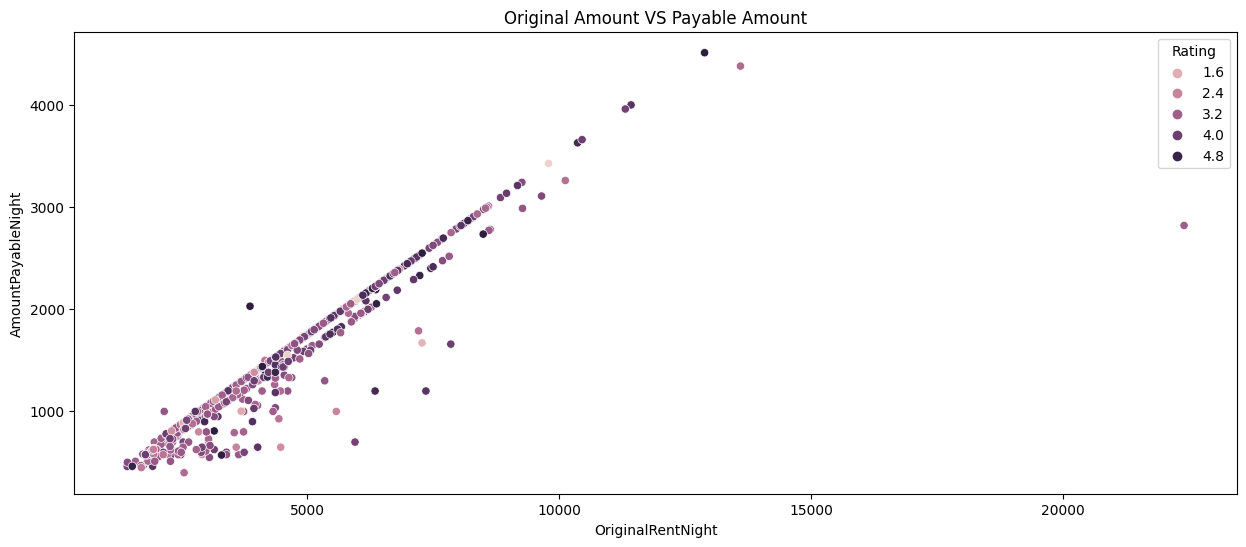

In [ ]:
size = (15, 6)
fig, ax = plt.subplots(figsize=size)
plt.title('Original Amount VS Payable Amount')
sns.scatterplot(data=oyo,x=oyo['OriginalRentNight'], y=oyo['AmountPayableNight'], hue=oyo['Rating'])
plt.show()

# original rent is high,Amount payable per night is high
#one outlier whose original rent is approx 25000 but amount to pay is approx 3000 with 3.2 star  rating it seems that gives approx 12%
#original rent is 5000 ,amount payble per night is 2000,with 4.8 rating is another outlier.

#maximum hotel whose original rent lies between approx 1000 to 9000 and discount rent is in between 500 to 3000

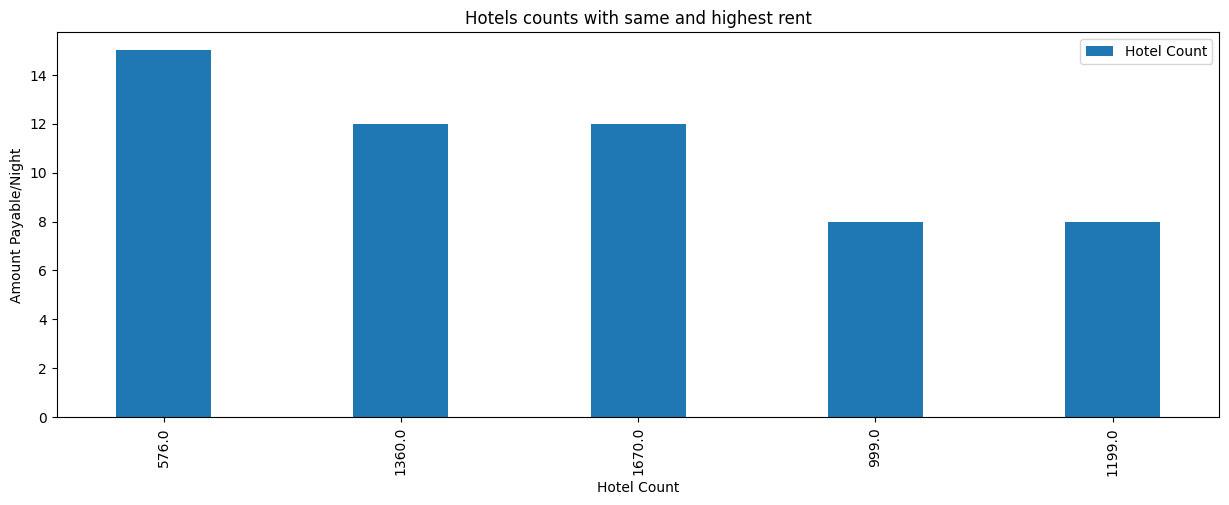

In [ ]:
plt.ylabel('Amount Payable/Night')
plt.xlabel('Hotel Count')
plt.title('Hotels counts with same and highest rent')
oyo['AmountPayableNight'].value_counts().nlargest(5).plot(kind='bar',figsize= (15,5),width = 0.4) 
plt.legend(["Hotel Count"])
plt.show()

#using this plot we realize that more than 14 hotels having same rent of INR 576 and around 12 hotels having same rent of INR 1360 and so on
#around 8 hotels which are mostly affortable with rent of INR 999 and 14 hotel are also very affortable with INR 576

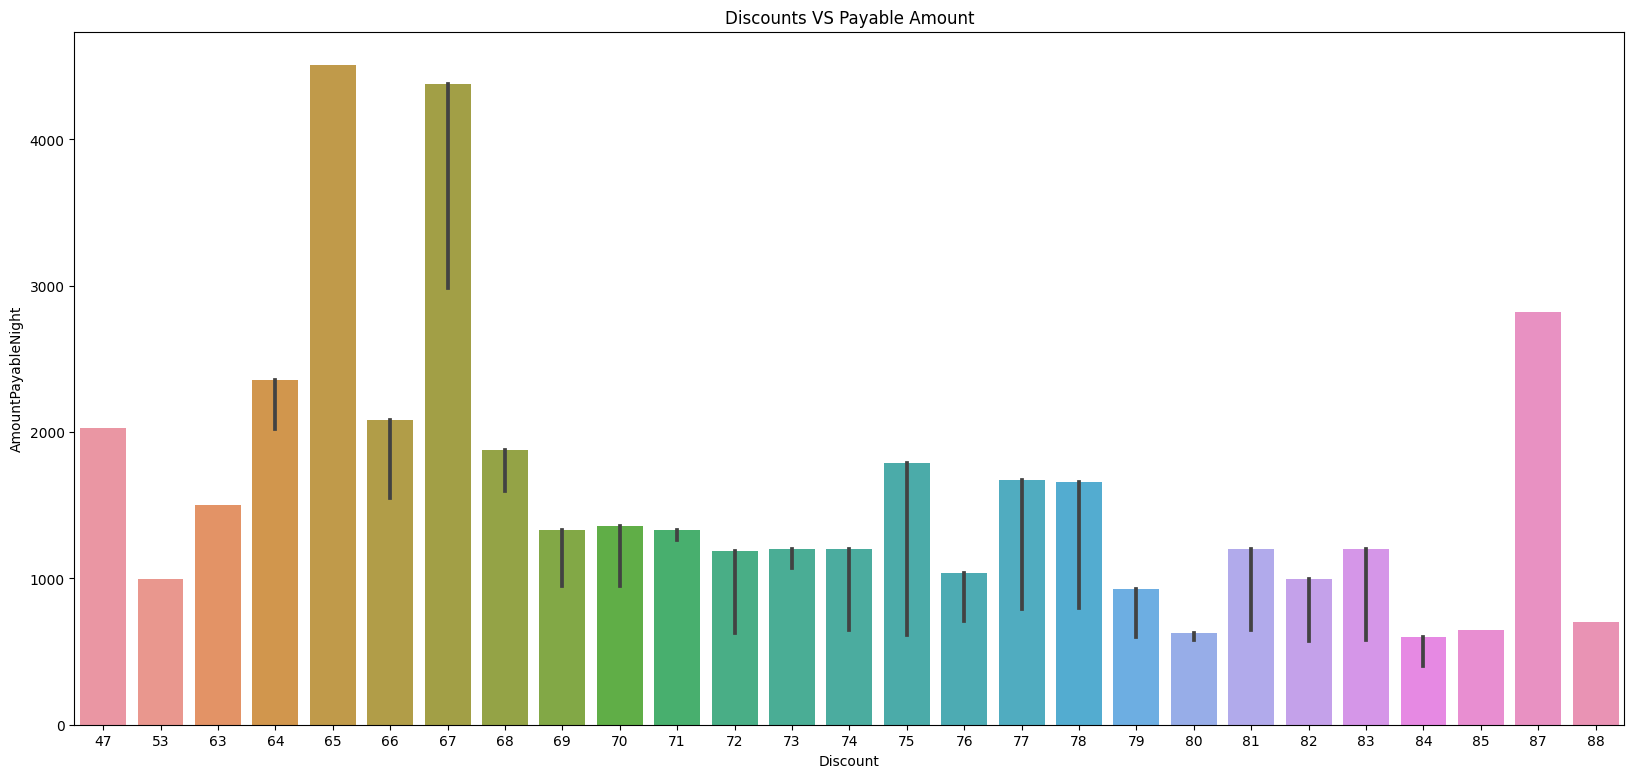

In [ ]:
size = (20, 9)
fig, ax = plt.subplots(figsize=size)
plt.title('Discounts VS Payable Amount')
sns.barplot(data=oyo,x=oyo['Discount'], y=oyo['AmountPayableNight'], estimator=np.max)
plt.show()

#By seeing this graph who pay high those discount is low but also exceptional case is there

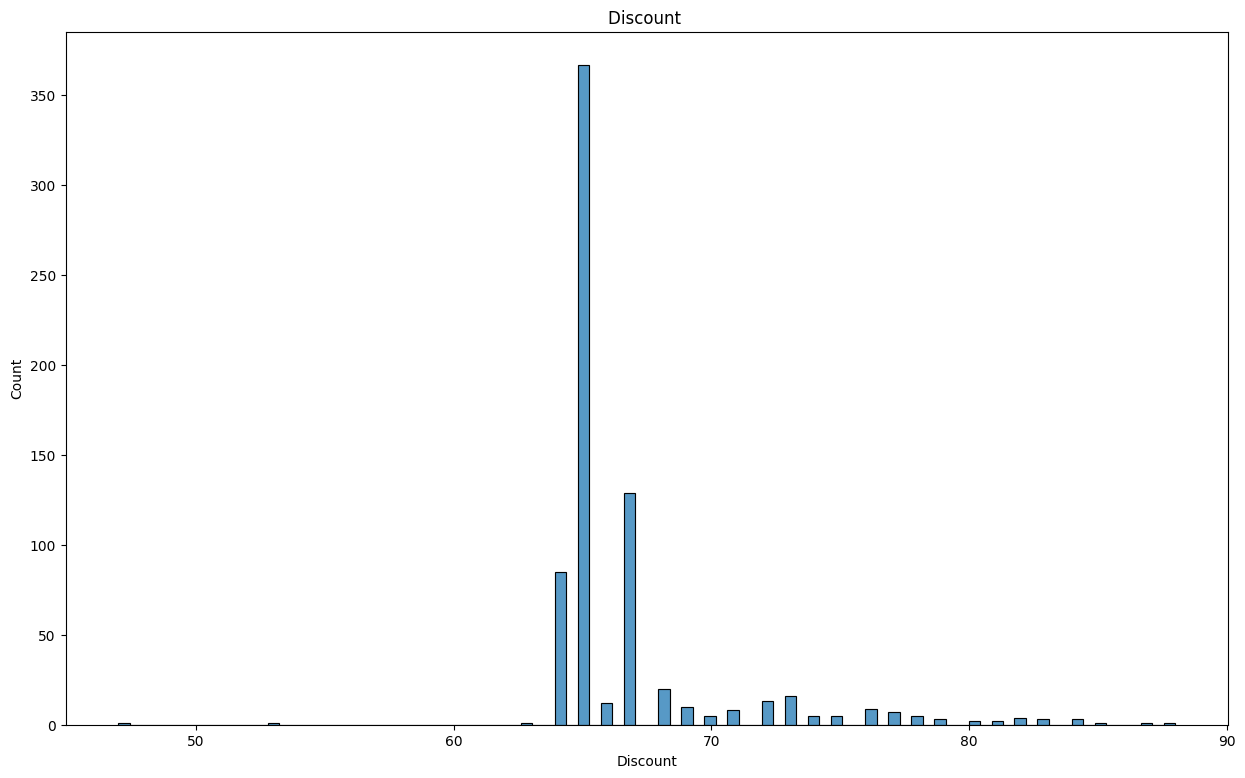

In [ ]:
size = (15, 9)
fig, ax = plt.subplots(figsize=size)
plt.title('Discount ')
sns.histplot(data=oyo, x=oyo['Discount'])
plt.show()

#by seeing above plot we can say that more than 350 hotels having discount of more than 60%,and around 120 hotel having discount of 65%

#The lowest discount rent is 70 and around 45 hotels with this discount



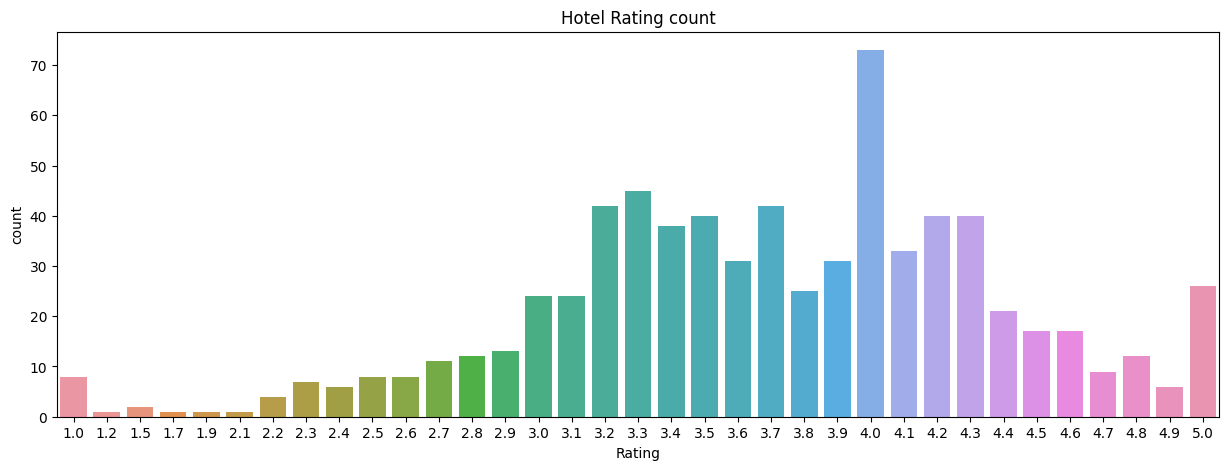

In [ ]:
size = (15, 5)
fig, ax = plt.subplots(figsize=size)
plt.title('Hotel Rating count')
sns.countplot(data=oyo, x=oyo['Rating'])
plt.show()

# by seeing above plot there are around 70 hotels having the rating of 4 star
#The remaining rating is normally distributed except 4 star

#around 10 hotels rating is 1.0 ,1.2,1.5,1.7,1.9,2.2,2.3,2.4,2.5,2.6

#for 5 star there are around 30 hotels

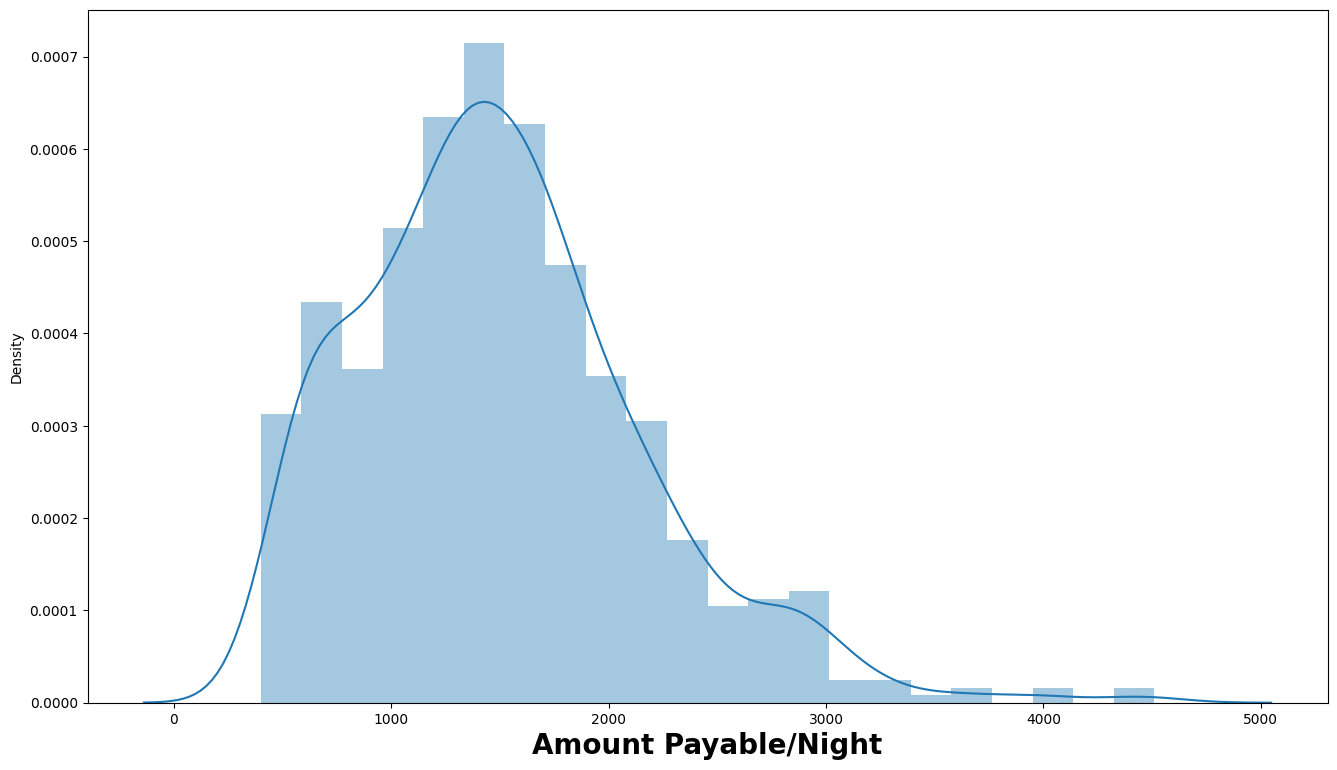

In [ ]:
fig = plt.figure(figsize=(16,9))
sns.distplot(oyo.AmountPayableNight)
plt.xlabel('Amount Payable/Night', fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

# looks like normally distributed 

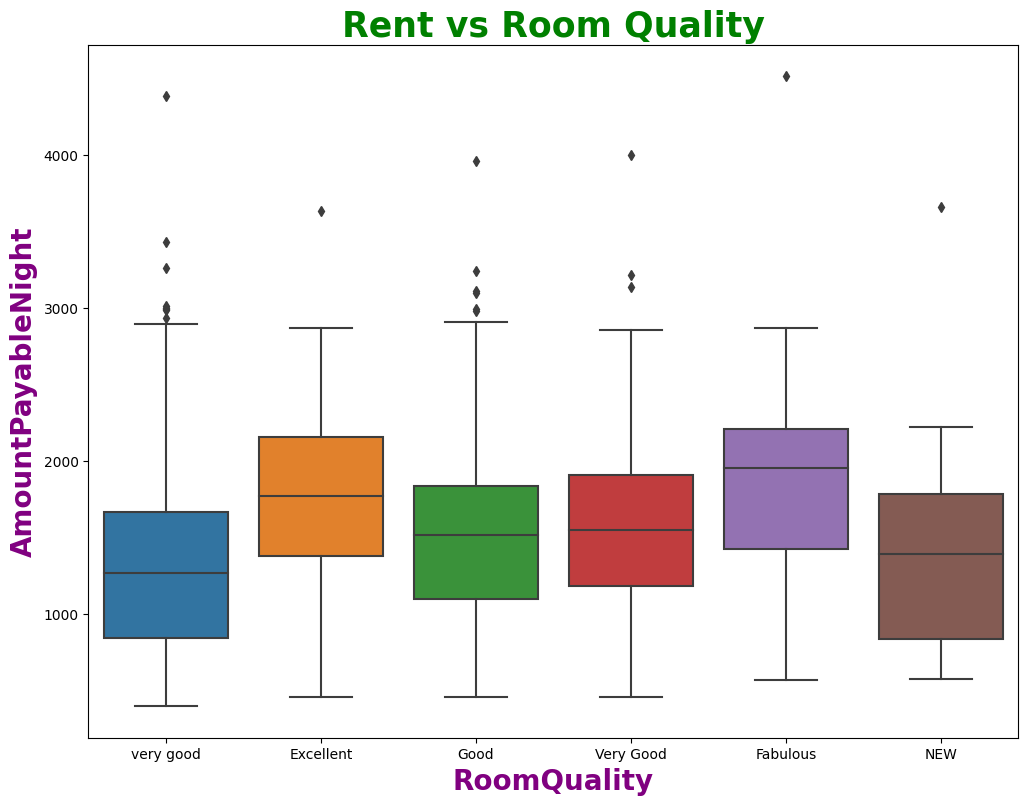

In [ ]:
fig = plt.figure(figsize=(12,9))
plt.ylabel('Amount Payable/Night', fontdict={'fontsize':20,'fontweight':'bold', 'color':'purple'})
plt.xlabel('Room Quality',fontdict={'fontsize':20,'fontweight':'bold', 'color':'purple'})
plt.title('Rent vs Room Quality',fontdict={'fontsize':25,'fontweight':'bold', 'color':'green'})
sns.boxplot(x='RoomQuality', y='AmountPayableNight', data =oyo, )
plt.show()

# outlier is there

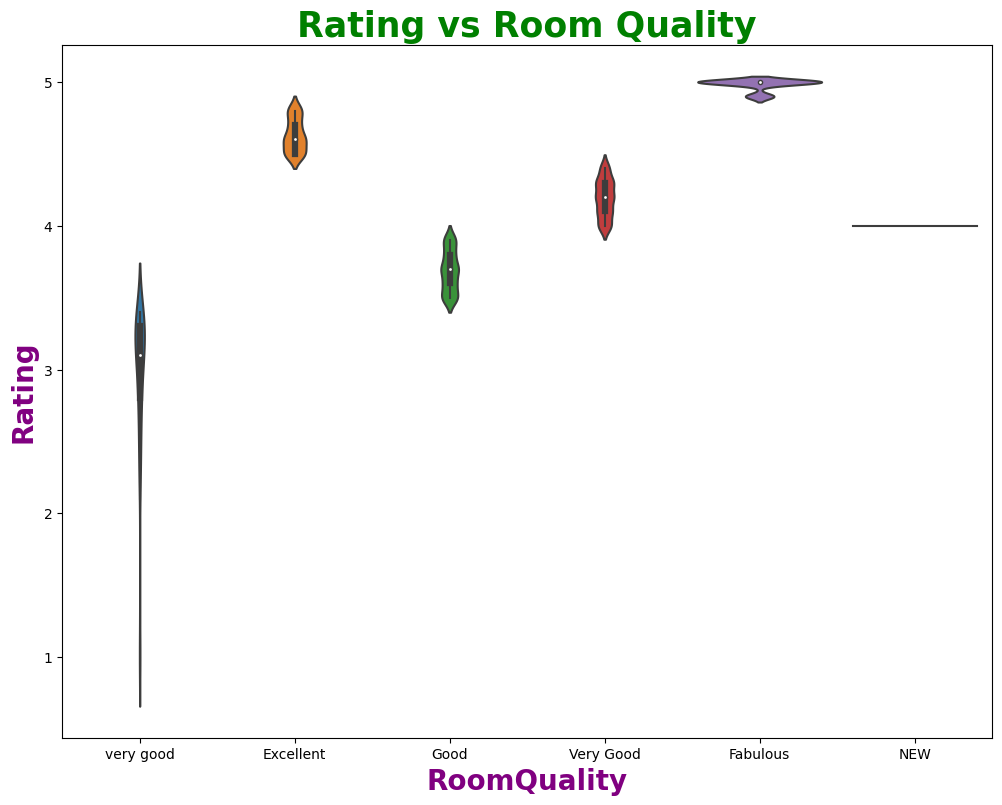

In [ ]:
fig = plt.figure(figsize=(12,9))
plt.ylabel('Rating', fontdict={'fontsize':20,'fontweight':'bold', 'color':'purple'})
plt.xlabel('Room Quality',fontdict={'fontsize':20,'fontweight':'bold', 'color':'purple'})
plt.title('Rating vs Room Quality',fontdict={'fontsize':25,'fontweight':'bold', 'color':'green'})
sns.violinplot(x='RoomQuality', y='Rating', data =oyo, )
plt.show()

In [ ]:
corrmat = oyo.corr()

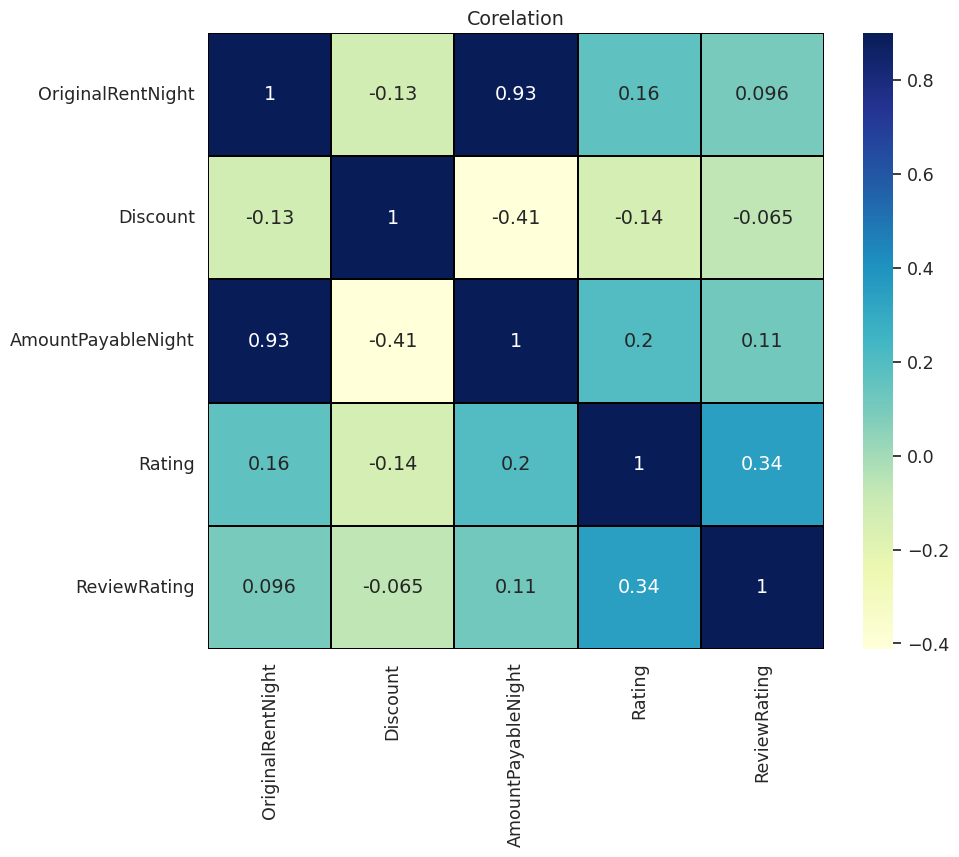

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(10,8))
sns.heatmap(corrmat,  vmax=0.9, linewidths=0.02,
           square=True,
            annot=True,
            cmap='YlGnBu',
            linecolor="black")
plt.title('Corelation')
plt.show()

# original rent and review rating is highly co-related
#payble amount and original amount is also highly co-rellated
#Review and original rent also highly positive co-related

In [ ]:
pune = oyo[(oyo['Location']=='Pune')]
mumbai = oyo[(oyo['Location']=='Mumbai')]
hyderabad = oyo[(oyo['Location']=='Hyderabad')]
bangalore = oyo[(oyo['Location']=='Bangalore')]
chennai = oyo[(oyo['Location']=='Chennai')]
delhi = oyo[(oyo['Location']=='Delhi')]
shimla = oyo[(oyo['Location']=='Shimla')]
goa = oyo[(oyo['Location']=='Goa')]
manali = oyo[(oyo['Location']=='Manali')]
mahabaleshwar = oyo[(oyo['Location']=='Mahabaleshwar')]
lonavala = oyo[(oyo['Location']=='Lonavala')]

# filter out those column whose rating greter than 4.5 , room quality is excellent and review rating greter than 500

In [ ]:
oyo[(oyo['Rating']>4.5)&(oyo['RoomQuality']== 'Excellent') & (oyo['ReviewRating']>500)]

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
17,Townhouse OAK Hotel Chaitanya Executive Near F...,"Near Shree Control Chowk, Dhayari,· 9.2 km",6932.0,65,2426.0,4.6,Doctor on call Reception Public washroom +...,905,Excellent,NaN
24,Super OYO Townhouse 749 The Upper Room Near Pu...,"Pune District, Pune· 7.5 km",7235.0,67,2330.0,4.8,Parking facility Reception Free Wifi + 17 ...,866,Excellent,PunePune
58,Flagship River View Near Shaniwar Wada,"Deccan, Pune· 1.4 km",NaN,65,NaN,4.6,AC TV,526,Excellent,Pune
136,Super OYO Collection O 15141 Townvilla Guest H...,"Hyderabad, Hyderabad· 7.0 km",5177.0,65,1812.0,4.8,24x7 Facility Manager Free Wifi Geyser + 7...,1501,Excellent,HyderabadHyderabad
148,Super OYO Capital O 11079 Hotel Prestige,"Paradise ,Secunderabad· 6.3 km",5014.0,65,1755.0,4.6,Parking facility Elevator Free Wifi + 9 more,3997,Excellent,NaN
153,Super OYO Townhouse 1033 Ameerpet,"Ameerpet Mandal, Hyderabad· 7.6 km",6122.0,65,2143.0,4.6,Reception Power backup Security + 12 more,2497,Excellent,Hyderabad
165,OYO Townhouse 359 Begumpet Near Hyderabad Central,"Vinn Hospital, Begumpet, Hyderabad· 6.7 km",7454.0,67,2400.0,4.6,Parking facility Reception Free Wifi + 15 ...,2527,Excellent,Hyderabad
177,Super OYO Townhouse 164 ESI Hospital Near Hyde...,"Sanath Nagar, Hyderabad· 8.8 km",5899.0,64,2065.0,4.7,Private entrance Reception Free Wifi + 11 ...,4019,Excellent,Hyderabad
189,Super OYO Townhouse OAK Hotel Belsons Taj Mahal,"Near Swapnalok Complex, Patny Centre, Hyderaba...",4839.0,64,1694.0,4.6,Doctor on call Reception Power backup + 25...,1590,Excellent,Hyderabad
271,Super OYO Townhouse 264 Trendy – Q Rooms BTM L...,"Near BTM Water Tank, Mico Layout, Bangalore· ...",6361.0,65,2191.0,4.8,Private entrance Reception Free Wifi + 19 ...,1755,Excellent,Bangalore


#filter out rating greater than 4.5 ,reviewrating greater than 1000 and amountpayblenight less than 1500

In [ ]:
oyo[(oyo['Rating']>4.5)& (oyo['ReviewRating']>1000)&(oyo['AmountPayableNight']<=1500)]

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
123,OYO Flagship 813020 The Metro International Hotel,"Nayapul, Hyderabad· 2.0 km",3154.0,74,808.0,5.0,Parking facility Free Wifi AC + 5 more,3097,Fabulous,Hyderabad
249,SPOT ON Yatra Inn Near Lalbagh Botanical Garden,"Lalbagh, Bangalore· 2.0 km",2937.0,65,1028.0,5.0,Reception Free Wifi Power backup + 4 more,2678,Fabulous,Bangalore
397,OYO SUN PARK INN Chennai Central,"Near Egmore Railway Hospital, Periamet, Chenna...",4037.0,65,1413.0,4.7,Private entrance Reception Power backup + ...,2203,Excellent,Chennai
405,SPOT ON Dream Palace Guest House Near Marina B...,"Triplicane High Road, Chennai· 2.0 km",1528.0,69,462.0,4.8,Reception Daily housekeeping CCTV cameras ...,1050,Excellent,Chennai
458,Super OYO Hotel Landmark Inn,Near Karol Bagh Metro Station· 5.1 km,6348.0,81,1199.0,4.6,Hair Dryer Free Wifi Power backup + 16 more,4220,Excellent,NaN


#rating greter than 4,amountpayblenight less than 1000 and reviewrating greter than 1000

In [ ]:
oyo[(oyo['Rating']>4) & (oyo['AmountPayableNight']<1000) &(oyo['ReviewRating']>1000)]

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
101,OYO Hotel Hyderabad Continental,"Near Tarakarama Theatre, Sultan Bazar, Hyderab...",2068.0,67,666.0,4.2,TV King Sized Bed Dress Hanger + 1 more,1644,Very Good,Hyderabad
104,SPOT ON Classic Lodge,"Near Board Of Intermediate Office, Hyderabad· ...",2177.0,67,701.0,4.4,AC Parking facility Elevator + 8 more,1615,Very Good,Hyderabad
120,Flagship Malkajgiri,"Malkajgiri, Hyderabad· 8.8 km",4018.0,83,649.0,4.3,Parking facility Reception Free Wifi + 12 ...,2935,Very Good,Hyderabad
123,OYO Flagship 813020 The Metro International Hotel,"Nayapul, Hyderabad· 2.0 km",3154.0,74,808.0,5.0,Parking facility Free Wifi AC + 5 more,3097,Fabulous,Hyderabad
161,OYO Hotel Shannu Residency,"Near Apollo Pharmacy, Secunderabad, Hyderabad·...",2286.0,72,625.0,4.1,Free Wifi Geyser TV,1051,Very Good,Hyderabad
163,OYO Home Pramod Prime Homes Near More super ma...,"Nagole, Hyderabad· 8.1 km",2861.0,67,921.0,4.2,Free Wifi TV AC,1312,Very Good,Hyderabad
193,OYO Luxury Villas Near Begumpet Airport,"Begumpet, Hyderabad· 7.0 km",3228.0,70,949.0,4.2,Free Wifi Power backup Card payment + 14 more,2085,Very Good,Hyderabad
250,Super OYO Hotel Subha Residency Near Cubbon Park,"Majestic, Bangalore· 2.7 km",3914.0,77,899.0,4.4,TV Free Wifi Geyser + 4 more,1686,Very Good,Bangalore
254,Flagship White Fort Near Lalbagh Botanical Garden,"Dispensary Rd, Kalasipalya,Bangalore· 2....",2982.0,67,960.0,4.3,Parking facility Elevator Free Wifi + 8 more,1041,Very Good,Bangalore
405,SPOT ON Dream Palace Guest House Near Marina B...,"Triplicane High Road, Chennai· 2.0 km",1528.0,69,462.0,4.8,Reception Daily housekeeping CCTV cameras ...,1050,Excellent,Chennai


#filter out amountpayblenight less than 500

In [ ]:
oyo[(oyo['AmountPayableNight']<500)]

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
118,SPOT ON Mohit Gokul Lodge New Room's Near Snow...,"Near To Secunderbad East Metro Rail Station, H...",1746.0,73,469.0,3.4,Parking facility Reception Free Wifi + 9 more,728,very good,Hyderabad
159,SPOT ON Gayatri Lodge Near Snow World,"Ranigunj, Hyderabad· 5.4 km",1428.0,67,460.0,3.9,Reception Free Wifi Power backup + 6 more,675,Good,Hyderabad
399,SPOT ON Ams Annex,"Opp Chepauk Stadium, OVM Street, Chennai· ...",1932.0,76,462.0,4.3,Reception Geyser Daily housekeeping + 4 more,144,Very Good,Chennai
405,SPOT ON Dream Palace Guest House Near Marina B...,"Triplicane High Road, Chennai· 2.0 km",1528.0,69,462.0,4.8,Reception Daily housekeeping CCTV cameras ...,1050,Excellent,Chennai
430,SPOT ON 75475 Cn Guest House,"Opp TO Vijay Park, Arumbakkam, Chennai· ...",1698.0,72,465.0,3.4,TV Queen Sized Bed Queen Sized Bed + 6 more,788,very good,Chennai
446,SPOT ON The Grand Guest House Near PVR Cinemas...,"Zone 8 Anna Nagar, Chennai· 6.8 km",1698.0,72,469.0,3.3,Reception Daily housekeeping Pet friendly ...,349,very good,Chennai
453,SPOT ON Grand Residency\t\t\t\t\t,"VV Koil Street,Periyamedu,Central Metro Statio...",1707.0,73,449.0,2.6,Parking facility Reception Free Wifi + 7 more,603,very good,NaN
469,OYO Hotel Park View Near Adarsh Nagar Metro St...,"Near Adarsh nagar, Matmy Memar, Delhi· 6...",2557.0,84,399.0,2.9,Hair Dryer Reception Power backup + 15 more,609,very good,Delhi


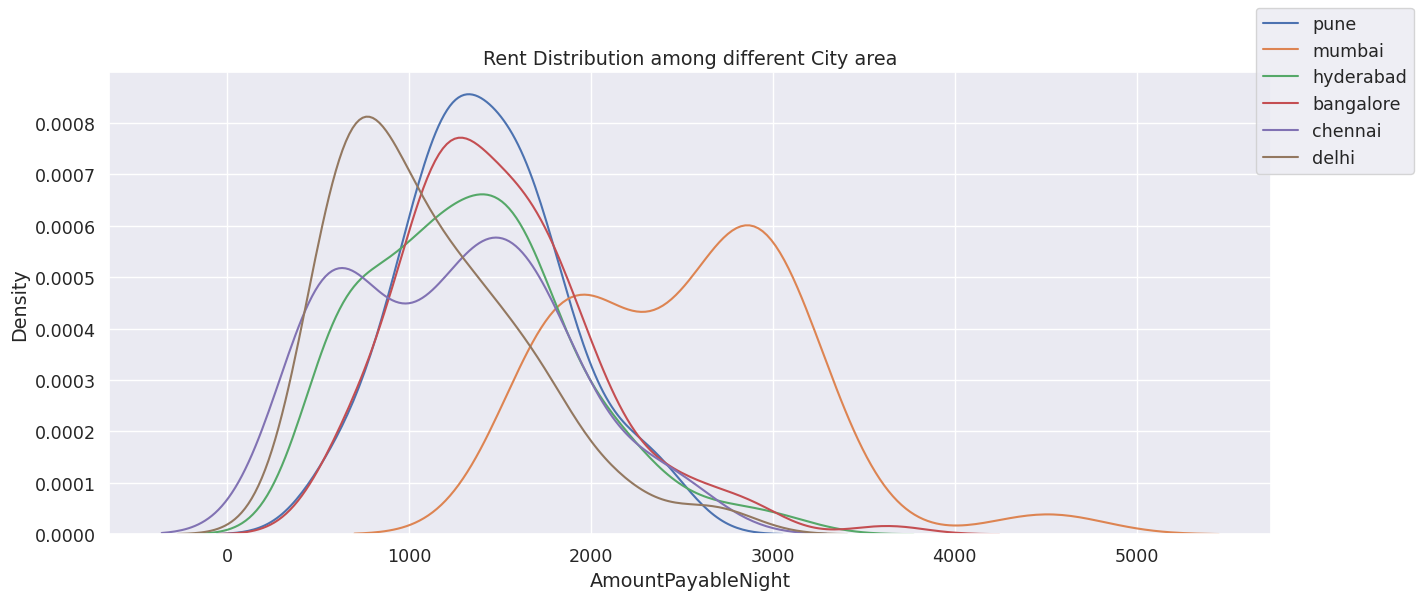

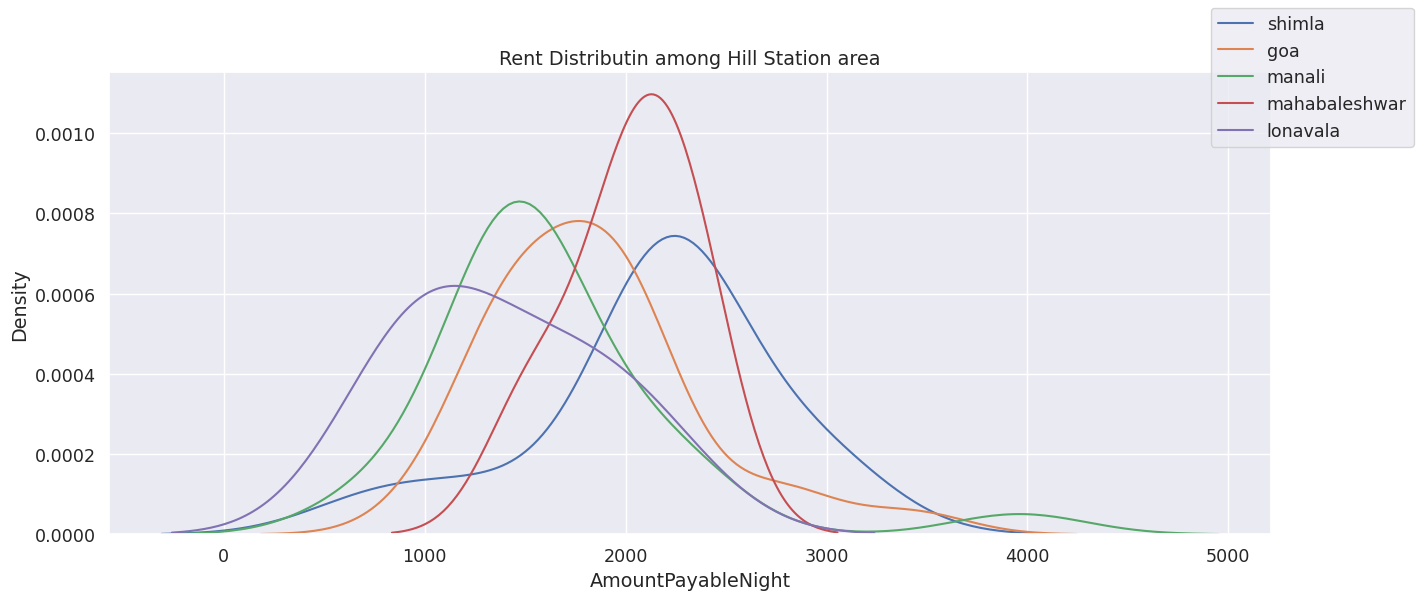

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.title('Rent Distribution among different City area')
sns.distplot(pune['AmountPayableNight'],hist=False)
sns.distplot(mumbai['AmountPayableNight'],hist=False)
sns.distplot(hyderabad['AmountPayableNight'],hist=False)
sns.distplot(bangalore['AmountPayableNight'],hist=False)
sns.distplot(chennai['AmountPayableNight'],hist=False)
sns.distplot(delhi['AmountPayableNight'],hist=False)
fig.legend(labels=['pune', 'mumbai', 'hyderabad', 'bangalore', 'chennai', 'delhi'])

fig = plt.figure(figsize=(15,6))
plt.title('Rent Distributin among Hill Station area')
sns.distplot(shimla['AmountPayableNight'],hist=False)
sns.distplot(goa['AmountPayableNight'],hist=False)
sns.distplot(manali['AmountPayableNight'],hist=False)
sns.distplot(mahabaleshwar['AmountPayableNight'],hist=False)
sns.distplot(lonavala['AmountPayableNight'],hist=False)
fig.legend(labels=['shimla', 'goa', 'manali', 'mahabaleshwar', 'lonavala'])

plt.show()

#the highest rent of city area from pune

# 1000 to 5000 is the maximum rent which is affordable

#in manali the range is normally distributed

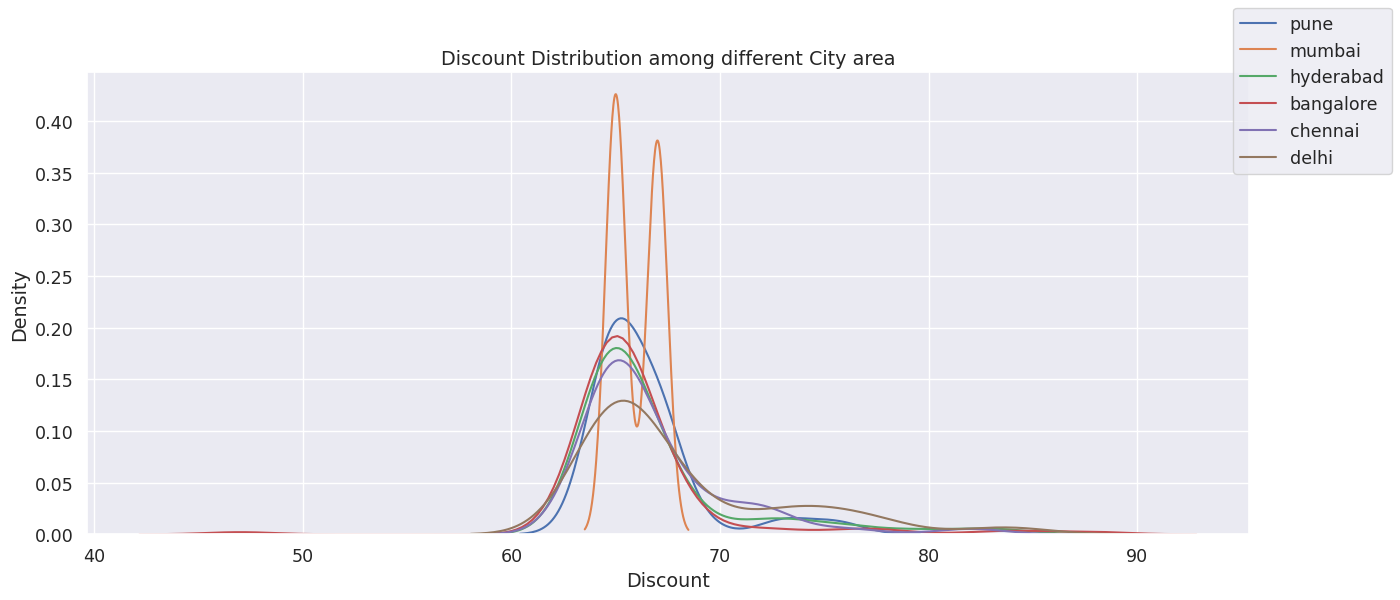

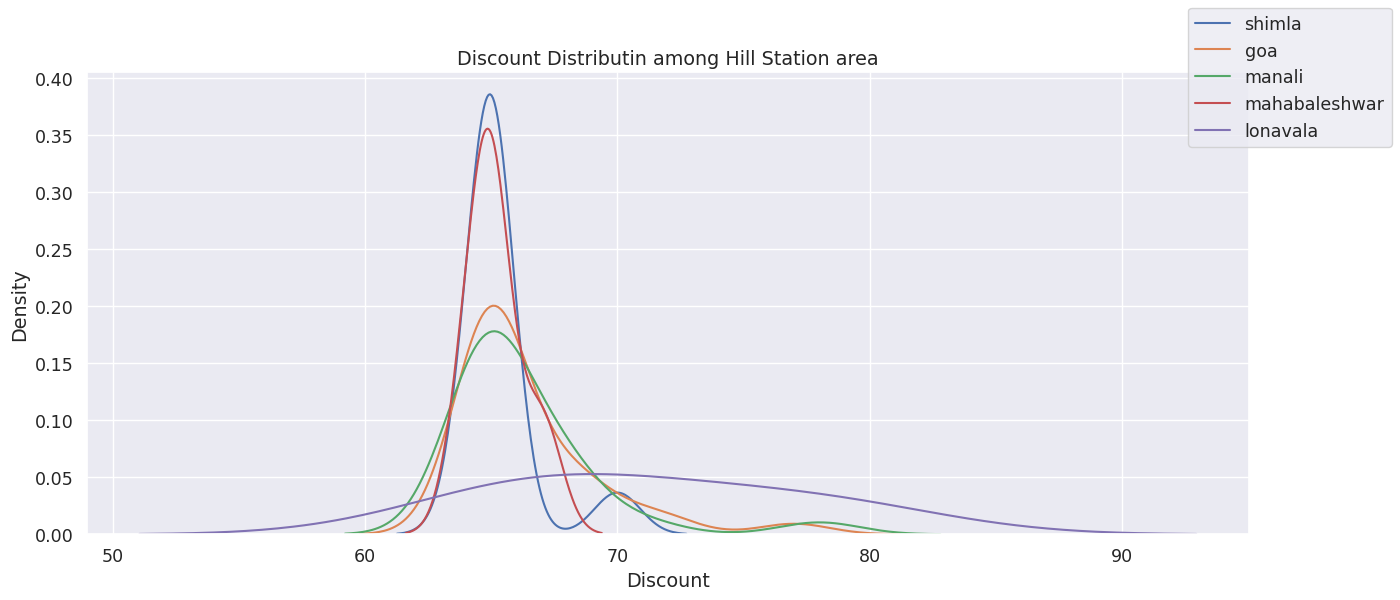

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.title('Discount Distribution among different City area')
sns.distplot(pune['Discount'],hist=False)
sns.distplot(mumbai['Discount'],hist=False)
sns.distplot(hyderabad['Discount'],hist=False)
sns.distplot(bangalore['Discount'],hist=False)
sns.distplot(chennai['Discount'],hist=False)
sns.distplot(delhi['Discount'],hist=False)
fig.legend(labels=['pune', 'mumbai', 'hyderabad', 'bangalore', 'chennai', 'delhi'])

fig = plt.figure(figsize=(15,6))
plt.title('Discount Distributin among Hill Station area')
sns.distplot(shimla['Discount'],hist=False)
sns.distplot(goa['Discount'],hist=False)
sns.distplot(manali['Discount'],hist=False)
sns.distplot(mahabaleshwar['Discount'],hist=False)
sns.distplot(lonavala['Discount'],hist=False)
fig.legend(labels=['shimla', 'goa', 'manali', 'mahabaleshwar', 'lonavala'])

plt.show()

# in goa the rent is normally distributed , but here some hotels have highest rent .
# in shimla the rent is normally distributed , but here some hotels have highest rent .


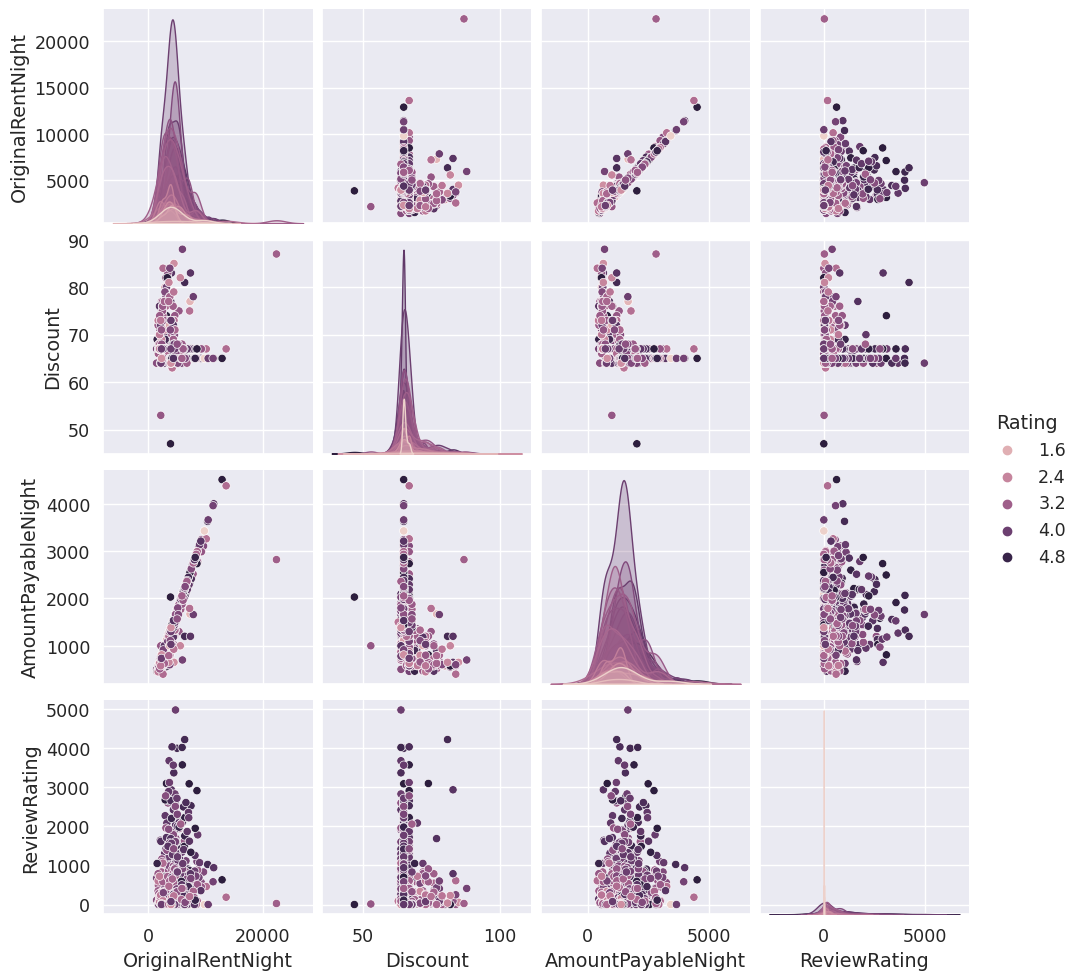

In [ ]:
sns.pairplot(oyo,hue="Rating")
plt.show()

# Based on user input it gives result

In [ ]:
city = input('Enter city name: ')
rent = int(input('Enter the rent: '))
oyo[(oyo['Location']==city)&(oyo['AmountPayableNight']<=rent)]

Enter city name: Pune
Enter the rent: 20000


,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
0,OYO Hotel G Residency Near INOX,"India, Pune· 4.3 km",3040.0,76,709.0,3.2,Doctor on call Reception Ticket tour assist...,232,very good,Pune
1,Super OYO Collection O Hotel Sunshine Near Inox,"Near New White House, Koregaon Park,Pune· ...",5678.0,67,1828.0,4.5,Parking facility Free Wifi Geyser + 8 more,1474,Excellent,Pune
2,OYO The Orchid Guest House Near Phugewadi Metr...,"Near Laxmi Mata Mandir, Pune· 5.5 km",3114.0,67,1003.0,3.4,Hair Dryer Parking facility Free Wifi + 11...,263,very good,Pune
3,OYO SilverKey Near Arup Hospital Near Pune Air...,"Near Tempo Chowk, Vadgaon Sheri, Pune· 7...",3422.0,64,1198.0,3.5,Reception Free Wifi Bedside Table / Desk +...,2599,Good,Pune
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",4188.0,67,1349.0,4.2,Free Wifi AC TV + 3 more,1289,Very Good,Pune
5,Collection O Safron Inn,"Dole Patil Road, Pune· 2.5 km",4461.0,67,1437.0,3.7,Reception Public washroom Power backup + 2...,631,Good,Pune
6,OYO Home Yana Heights,"Kondhwa, Pune· 6.4 km",3758.0,67,1210.0,4.1,Parking facility Private entrance Free Wifi...,852,Very Good,Pune
7,Super OYO Flagship Chaitanya Near Fun Time Mul...,"Near Jain Mandir, Jadhav Nagar Lane No. 11, Pu...",5435.0,67,1750.0,5.0,Reception Free Wifi Power backup + 7 more,2146,Fabulous,Pune
8,OYO Home Peaceful Stay Keshav Nagar Near Amano...,"Mundhwa, Pune· 9.8 km",3668.0,67,1181.0,3.7,Private entrance Parking facility Elevator ...,1537,Good,Pune
9,OYO Hotel Padma Krishna Near Lal Mahal,"Barne Road, Pune· 0.8 km",4794.0,65,1678.0,3.6,Power backup AC TV + 28 more,1694,Good,Pune


# based on user given city it gives output

In [ ]:
city = input('Enter city name: ')
oyo[(oyo['Location']==city)&(oyo['Rating']>=4) & (oyo['ReviewRating']>1000)&(oyo['AmountPayableNight']<1500)]

Enter city name: Pune


,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",4188.0,67,1349.0,4.2,Free Wifi AC TV + 3 more,1289,Very Good,Pune


In [ ]:
def system_recommand():
    print('Please enter the city name correctly in Capatalised format')
    city = input('Enter city name: ')
    a = oyo.index[(oyo['Location']==city)&(oyo['Rating']>4) & (oyo['ReviewRating']>1000)&(oyo['AmountPayableNight']<1500)].to_list()
    
    print('\nAll Hotels Rating is grater than 4, Reviews are greater than 1000 and Rent is less than 1500\n\n')
    print('*'*100)
    for i in a:
        print(oyo.iloc[i],'\n','-'*100,'\n')
    print('There is no more hotels as per requirement\n')
    print('If there is no system recomended hotel you can filter hotels as per your requirements\n')

In [ ]:
def user_required():
    print("Enter the data to recommand hotels to you: ")
    city = input('City: ')
    rent = int(input('Rent (System is showing all the hotels under the entered rent): '))
    rating = int(input('Rating: '))
    a = oyo.index[(oyo['Location']==city)&(oyo['Rating']>rating)&(oyo['AmountPayableNight']<rent)].to_list()   
    
    print('*'*100)
    for i in a:
        print(oyo.iloc[i],'\n','-'*100,'\n')
    print('There is no more hotels as per requirement')
    

In [ ]:
print('Enter your choice\n1. System recommanded OYO Room\n2. User required\n')
choice = int(input('Your choice'))
if choice == 1:
    system_recommand()
elif choice == 2:
    user_required()
else:
    print('Please select proper choice ')

Enter your choice
1. System recommanded OYO Room
2. User required

Your choice2
Enter the data to recommand hotels to you: 
City: Hyderabad
Rent (System is showing all the hotels under the entered rent): 3000
Rating: 4
****************************************************************************************************
HotelName                               OYO Hotel Hyderabad Continental
Address               Near Tarakarama Theatre, Sultan Bazar, Hyderab...
OriginalRentNight                                                2068.0
Discount                                                             67
AmountPayableNight                                                666.0
Rating                                                              4.2
Facility                     TV  King Sized Bed  Dress Hanger  + 1 more
ReviewRating                                                       1644
RoomQuality                                                   Very Good
Location                        

#shows the system recomended hotel as per location

#small testing to gives index, location is pune ,rating greater than 4,reviewrating greter than 1000, and amountpayblenight is less than 1500

In [ ]:
a = oyo.index[(oyo['Location']=='Pune')&(oyo['Rating']>4) & (oyo['ReviewRating']>1000)&(oyo['AmountPayableNight']<1500)].to_list()
a

[4]

In [ ]:
oyo.iloc[a]

,HotelName,Address,OriginalRentNight,Discount,AmountPayableNight,Rating,Facility,ReviewRating,RoomQuality,Location
4,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"Vadgaon Budruk, Pune· 6.5 km",4188.0,67,1349.0,4.2,Free Wifi AC TV + 3 more,1289,Very Good,Pune
